# DS321: Computational Statistics <br>

##   Laboratory Exercise: Monte Carlo

University of Science and Technology of Southern Philippines <br>

## Student Name: <code>Romen Samuel Wabina</code>


Instructor: **Romen Samuel Wabina, MSc** <br>
MSc Data Science and AI | Asian Institute of Technology <br>
*ongoing* PhD Data Science (Healthcare and Clinical Informatics) 


### Instructions
- Please submit this laboratory exercise as a **Jupyter Notebook file** <code>.ipynb</code> via email <code>romensamuelrodis.wab@student.mahidol.edu</code>

In [2]:
import numpy as np
import seaborn as sns
from tqdm import trange
from scipy.stats import norm
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['figure.figsize'] = (15.0, 8.0)
sns.set_style("white")

plot_dir = './plots/'

A simulation is the imitation of the operation of a real-world process or system over time. Simulations require the use of models or key characteristics or behaviors of the selected system or process, where the simulation represents the evolution of the model over time. Historically, simulations used in different fields developed largely independently, but 20th-century studies of systems theory and cybernetics combined with spreading use of computers across all those fields have led to some unification and a more systematic view of the  concept.

There different well known types of simulation: Physical simulation, Continuous simulation or Discrete-event simulation, which studies systems whose states change their values only at discrete times. 

Stochastic simulation is a simulation in which a variable or process is subject to random variations and is designed using Monte Carlo techniques using pseudo-random numbers. In this way, replicated runs  with the same boundary conditions will lead to different results within a certain range of confidence

A computer simulation :  <code>sim</code> is an attempt to model a real-life or hypothetical situation on a computer so that it can be studied to see how the system works. By changing variables in the simulation, predictions may be made about the behaviour of the system. It is a tool to virtually investigate the behaviour of the system under study.

A Monte Carlo Simulation is **a problem-solving technique used to approximate the probability of certain outcomes by running multiple trial runs, called simulations, using random variables.** ... It then simulates the completion of remaining work and produces a histogram showing the distribution of possible delivery dates. It has 4 steps:<br>
   
1. Define the distribution of possible inputs for each input random variable.
2. Generate the inputs randomly for those distributions.
3. Perform the deterministic computation using that set of inputs.
4. Aggregate the results in the individual computation into a final result.

# Monte Carlo Algorithm for $\pi$ Estimation in Python

This notebook will demonstrate how to estimate $\pi$ using a Monte Carlo algorithm.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

We choose the number of points and we randomly select them:

In [4]:
n_points = 1000
x_data = np.random.rand(n_points)
y_data = np.random.rand(n_points)

We count how many points are inside the circle:

In [5]:
n_circle = 0
for i in range(0,n_points-1):
    if (math.sqrt(x_data[i] ** 2 + y_data[i]**2) <= 1):
        n_circle = n_circle+1

So our approximation of $\pi$ is:

In [6]:
aprox_pi = 4*(n_circle/n_points)
print(aprox_pi)

3.18


The percent error is:

In [7]:
100*math.fabs(math.pi-aprox_pi)/math.pi

1.2225438064454426

In [8]:
circle_x = x_data[np.sqrt(x_data**2+y_data**2)<=1]
circle_y = y_data[np.sqrt(x_data**2+y_data**2)<=1]

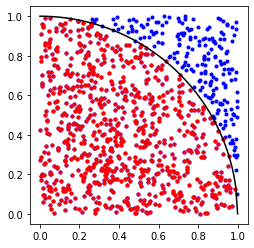

In [9]:
fig = plt.figure()
plot = fig.add_subplot(111)
plot.scatter(x_data, y_data, marker='.', color='blue')
plot.scatter(circle_x,circle_y, marker='.', color='red')

x = np.linspace(0, 1, 100)
y = np.sqrt(1-x**2)

plot.plot(x,y,color='black')

plot.set_aspect(1.0)

plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

$\pi$ is a constant that represents the ratio of the circumference to the diameter of a circle. It is irrational, meaning it has infinite digits which follow no pattern. This example show and "uncertan" estimation of $\pi $ comparing  a game of darts.
As we can see, we are generating random points within a box, and counting the number of points which fall within an embedded circle. For the sake of simplicity, we only look at the upper quadrant of our dartboard, which has a radius R and is mounted on a square piece of wood of the same width. If we throw 100 darts with  the probability of a darts hitting the board will be π/4 , and count the number of darts which successfully hit the dartboard, we might obtain the following plot.

# Monte Carlo Simulation in Sales Compensation Budget

Lets try to predict how much money we should budget for sales commissions for the next year. For example the  task of  Ivancho or Maryika as analyst is to tell finance how much to budget for sales commissions for next year. One approach might be to assume everyone makes 100% of their target and earns the 4% commission rate. The best way to do this prediction is by using Monte Carlo simulation.
Becauset commissions has been paid of for several years, Ivancho and Maryika  can look at a typical historical distribution of percent to target. In this case the distribution looks like a normal distribution with a mean of 100% and standard deviation of 10%.
<center>
<img src="figs/pic8.png">
</center>


In [10]:
avg = 1
std_dev = .1
num_reps = 500 #number of sales reps
num_simulations = 1000 #number of simulation

In [11]:
pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2) 

In [12]:
sales_target_values = [75_000, 100_000, 200_000, 300_000, 400_000, 500_000]
sales_target_prob = [.3, .3, .2, .1, .05, .05]
sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)

In [15]:
df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                               'Sales_Target': sales_target})

df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']
df

,Pct_To_Target,Sales_Target,Sales
0,0.84,200000,168000.0
1,1.05,75000,78750.0
2,1.01,100000,101000.0
3,0.95,300000,285000.0
4,0.92,200000,184000.0
...,...,...,...
495,0.99,400000,396000.0
496,1.13,75000,84750.0
497,0.97,300000,291000.0
498,0.95,100000,95000.0


In [16]:
def calc_commission_rate(x):
    """ Return the commission rate based on the table:
    0-90% = 2%
    91-99% = 3%
    >= 100 = 4%
    """
    if x <= .90:
        return .02
    if x <= .99:
        return .03
    else:
        return .04

In [17]:
df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

And finally the The real “magic” of the Monte Carlo simulation is that if Maryika runs a simulation many times, we start to develop a picture of the likely distribution of results. 


In [18]:
# Define a list to keep all the results from each simulation 
all_stats = []

# Loop through many simulations
for i in range(num_simulations):

    # Choose random inputs for the sales targets and percent to target
    sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)
    pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)

    # Build the dataframe based on the inputs and number of reps
    df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                                   'Sales_Target': sales_target})

    # Back into the sales number using the percent to target rate
    df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

    # Determine the commissions rate and calculate it
    df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
    df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

    # We want to track sales,commission amounts and sales targets over all the simulations
    all_stats.append([df['Sales'].sum().round(0),
                      df['Commission_Amount'].sum().round(0),
                      df['Sales_Target'].sum().round(0)])

In [19]:
results_df = pd.DataFrame.from_records(all_stats, columns=['Sales',
                                                           'Commission_Amount',
                                                           'Sales_Target'])

In [20]:
results_df.describe().style.format('{:,}')

,Sales,Commission_Amount,Sales_Target
count,"1,000.0","1,000.0","1,000.0"
mean,"83,727,055.0","2,859,283.264","83,709,275.0"
std,"2,745,181.356195507","102,926.68515775619","2,703,011.44471222"
min,"74,069,500.0","2,461,642.0","74,975,000.0"
25%,"81,883,250.0","2,792,373.0","81,900,000.0"
50%,"83,703,125.0","2,855,532.5","83,812,500.0"
75%,"85,551,437.5","2,925,501.25","85,556,250.0"
max,"95,101,500.0","3,222,472.0","95,150,000.0"


<center>
<img src="figs/pic11.png">
</center>

# Question Prompt

Given the following current equation

$$I(\Delta L, \Delta V_{TH}) = \frac{50}{0.1 + \Delta L} (0.6 - \Delta V_{TH})^2$$

* $\Delta L \sim \ N(0, 0.01^2)$
* $\Delta V_{TH} \sim \ N(0, 0.03^2)$

We would like to calculate $P(I > 275)$ using direct Monte-Carlo and Importance Sampling.

## Direct Monte-Carlo Estimation

In MC estimation, we approximate an integral by the sample mean of a function of simulated random variables. In more mathematical terms,

$$\int p(x)\ f(x)\ dx = \mathbb{E}_{p(x)} \big[\ f(x) \big] \approx \frac{1}{N} \sum_{n=1}^{N}f(x_n)$$

where $x_n \sim \ p(x)$.

A useful application of MC is probability estimation. In fact, we can cast a probability as an expectation using the indicator function. In our case, given that $A = \{I \ | \ I > 275\}$, we define $f(x)$ as

$$f(x) = I_{A}(x)= \begin{cases} 
      1 & I \geq 275 \\
      0 & I < 275 
   \end{cases}$$
   
Replacing in our equation above, we get

$$\int p(x) \ f(x) \ dx = \int I(x)\ p(x) \ d(x) = \int_{x \in A} p(x)\ d(x) \approx \frac{1}{N} \sum_{n=1}^{N}I_{A}(x_n)$$

In [9]:
def monte_carlo_proba(num_simulations, num_samples, verbose=True, plot=False):
    
    if verbose:
        print("{} Monte Carlo Simulations of size {}".format(num_simulations, num_samples))
    
    num_samples = int(num_samples)
    num_simulations = int(num_simulations)
    
    probas = []
    for i in range(num_simulations):
        mu_1, sigma_1 = 0, 0.01
        mu_2, sigma_2 = 0, 0.03

        length  = np.random.normal(mu_1, sigma_1, num_samples)
        voltage = np.random.normal(mu_2, sigma_2, num_samples)

        num = 50 * np.square((0.6 - voltage))
        denum = 0.1 + length
        I = num / denum
        
        true_condition = np.where(I >= 275)
        false_condition = np.where(I < 275)
        num_true = true_condition[0].shape[0]
        proba = num_true / num_samples
        probas.append(proba)
        
        if plot:
            if i == (num_simulations - 1):
                plt.scatter(length[true_condition], voltage[true_condition], color='r')
                plt.scatter(length[false_condition], voltage[false_condition], color='b')
                plt.xlabel(r'$\Delta L$ [$\mu$m]')
                plt.ylabel(r'$\Delta V_{TH}$ [V]')
                plt.title("Monte Carlo Estimation of P(I > 275)")
                plt.grid(True)
                plt.show()
    
    
    mean_proba = np.mean(probas)
    std_proba = np.std(probas)
    
    if verbose:
        print("Probability mean: {:0.5f}".format(mean_proba))
        print("Probability std:  {:0.5f}".format(std_proba))
    
    return probas

100 Monte Carlo Simulations of size 10000


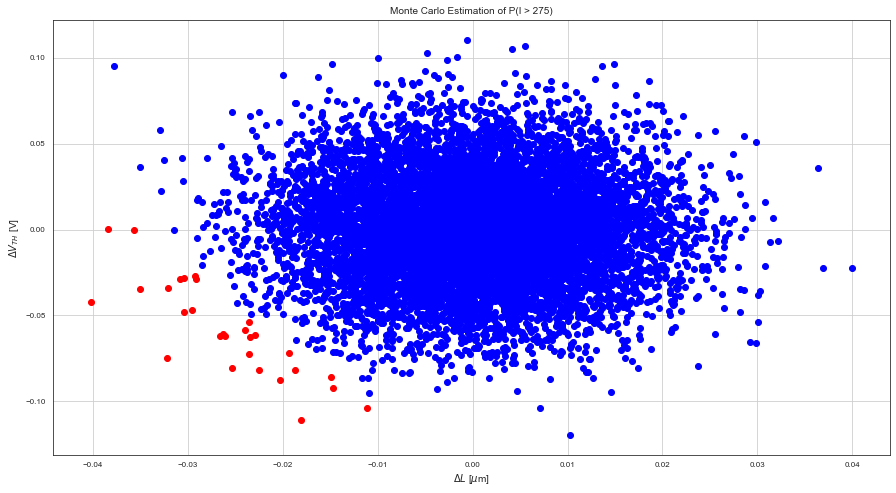

Probability mean: 0.00212
Probability std:  0.00049


In [10]:
probas = monte_carlo_proba(100, 10000, plot = True)

In [11]:
def MC_histogram(num_samples, plot=True):
    
    num_samples = int(num_samples)
    
    mu_1, sigma_1 = 0, 0.01
    mu_2, sigma_2 = 0, 0.03

    length = np.random.normal(mu_1, sigma_1, num_samples)
    voltage = np.random.normal(mu_2, sigma_2, num_samples)

    num = 50 * np.square((0.6 - voltage))
    denum = 0.1 + length
    I = num / denum
    
    if plot:
        n, bins, patches = plt.hist(I, 50, facecolor='green', alpha=0.75)
        plt.ylabel('Number of Samples')
        plt.xlabel(r'$I_{DS}$ [$\mu$A]')
        plt.title("Monte Carlo Estimation of P(I > 275)")
        plt.grid(True)
        plt.show()

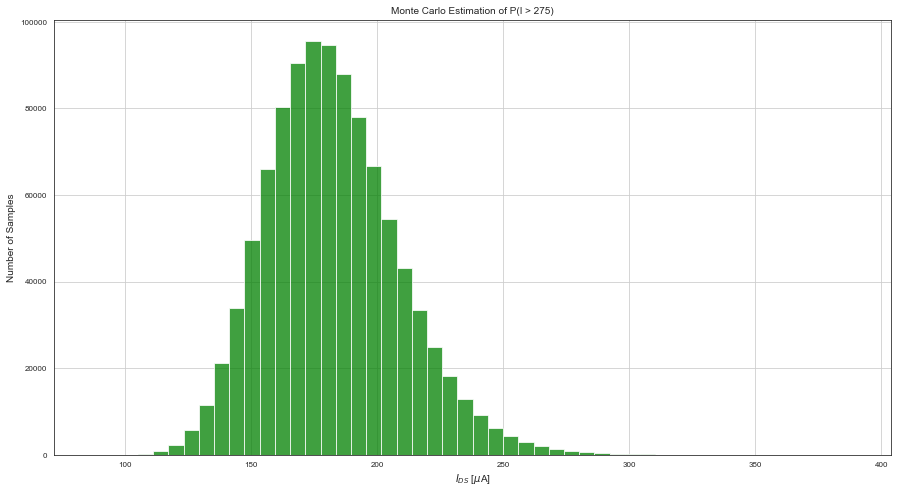

In [12]:
MC_histogram(1e6)

In [13]:
num_samples = [1e3, 1e4, 1e5, 1e6]
num_repetitions = 25

total_probas = []
for i, num_sample in enumerate(num_samples):
    print("Iter {}/{}".format(i+1, len(num_samples)))
    probas = monte_carlo_proba(num_repetitions, num_sample, verbose=False)
    total_probas.append(probas)

Iter 1/4
Iter 2/4
Iter 3/4
Iter 4/4


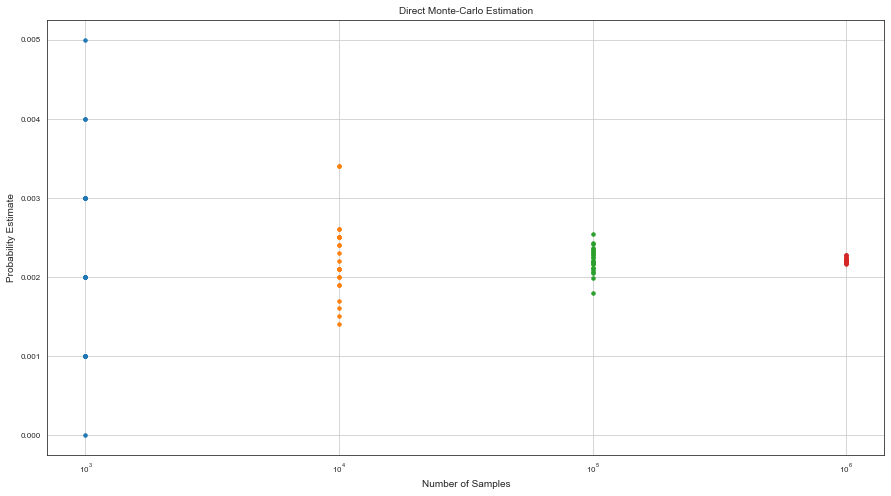

In [14]:
y_axis = np.asarray(total_probas)
x_axis = np.asarray(num_samples)

for x, y in zip(x_axis, y_axis):
    plt.scatter([x] * len(y), y, s=12)

plt.xscale('log')
plt.title("Direct Monte-Carlo Estimation")
plt.ylabel("Probability Estimate")
plt.xlabel('Number of Samples')
plt.grid(True)
plt.show()

## Importance Sampling

Importance sampling is a Monte Carlo method for evaluating properties of a particular distribution, while only having samples generated from a different distribution than the distribution of interest. Importance sampling is a variance reduction technique that can be used in the Monte Carlo method. The idea behind importance sampling is that certain values of the input random variables in a simulation have more impact on the parameter being estimated than others. If these "important" values are emphasized by sampling more frequently, then the estimator variance can be reduced. Hence, the basic methodology in importance sampling is to choose a distribution which "encourages" the important values.


With importance sampling, we try to reduce the variance of our Monte-Carlo integral estimation by choosing a better distribution from which to simulate our random variables. It involves multiplying the integrand by 1 (usually dressed up in a “tricky fashion”) to yield an expectation of a quantity that varies less than the original integrand over the region of integration. Concretely,

$$\mathbb{E}_{p(x)} \big[\ f(x) \big] = \int f(x)\ p(x)\ dx = \int f(x)\ p(x)\ \frac{q(x)}{q(x)}\ dx = \int \frac{p(x)}{q(x)}\cdot f(x)\ q(x)\ dx = \mathbb{E}_{q(x)}  \big[\ f(x)\cdot \frac{p(x)}{q(x)} \big]$$

Thus, the MC estimation of the expectation becomes:

$$\mathbb{E}_{q(x)}  \big[\ f(x)\cdot \frac{p(x)}{q(x)} \big] \approx \frac{1}{N} \sum_{n=1}^{N} w_n \cdot f(x_n)$$

where $w_n = \dfrac{p(x_n)}{q(x_n)}$

In our current example above, we can alter the mean and/or standard deviation of $\Delta L$ and $\Delta V_{TH}$ in the hopes that more of our sampling points will fall in the failure region (red area). For example, let us define 2 new distributions with altered $\sigma^2$.

* $\Delta \hat{L} \sim \ N(0, 0.02^2)$
* $\Delta \hat{V}_{TH} \sim \ N(0, 0.06^2)$

In [14]:
def importance_sampling(num_simulations, num_samples, verbose=True, plot=False):
    
    if verbose:
        print("{} Importance Sampling Simulations of size {}".format(num_simulations, num_samples))
    
    num_simulations = int(num_simulations)
    num_samples = int(num_samples)
    
    probas = []
    for i in range(num_simulations):
        mu_1, sigma_1 = 0, 0.01
        mu_2, sigma_2 = 0, 0.03
        mu_1_n, sigma_1_n = 0, 0.02
        mu_2_n, sigma_2_n = 0, 0.06
        
        # setup pdfs
        old_pdf_1 = norm(mu_1, sigma_1)
        new_pdf_1 = norm(mu_1_n, sigma_1_n)
        old_pdf_2 = norm(mu_2, sigma_2)
        new_pdf_2 = norm(mu_2_n, sigma_2_n)

        length = np.random.normal(mu_1_n, sigma_1_n, num_samples)
        voltage = np.random.normal(mu_2_n, sigma_2_n, num_samples)
        
        # calculate current
        num = 50 * np.square((0.6 - voltage))
        denum = 0.1 + length
        I = num / denum
        
        # calculate f
        true_condition = np.where(I >= 275)

        # calculate weight
        num = old_pdf_1.pdf(length) * old_pdf_2.pdf(voltage)
        denum = new_pdf_1.pdf(length) * new_pdf_2.pdf(voltage)
        weights = num / denum

        # select weights for nonzero f
        weights = weights[true_condition]

        # compute unbiased proba
        proba = np.sum(weights) / num_samples
        probas.append(proba)
        
        false_condition = np.where(I < 275)
        if plot:
            if i == num_simulations -1:
                plt.scatter(length[true_condition], voltage[true_condition], color='r')
                plt.scatter(length[false_condition], voltage[false_condition], color='b')
                plt.xlabel(r'$\Delta L$ [$\mu$m]')
                plt.ylabel(r'$\Delta V_{TH}$ [V]')
                plt.title("Monte Carlo Estimation of P(I > 275)")
                plt.grid(True)
                plt.show()
    
    
    mean_proba = np.mean(probas)
    std_proba = np.std(probas)
    
    if verbose:
        print("Probability mean: {}".format(mean_proba))
        print("Probability std:  {}".format(std_proba))
    
    return probas

In [15]:
probas = importance_sampling(10, 10000, plot=False)

10 Importance Sampling Simulations of size 10000
Probability mean: 0.0021540976508471047
Probability std:  0.00013526835264929924


In [19]:
def IS_histogram(num_samples, plot=True):
    
    num_samples = int(num_samples)

    mu_1_n, sigma_1_n = 0, 0.02
    mu_2_n, sigma_2_n = 0, 0.06

    length = np.random.normal(mu_1_n, sigma_1_n, num_samples)
    voltage = np.random.normal(mu_2_n, sigma_2_n, num_samples)

    # calculate biased current
    num = 50 * np.square((0.6 - voltage))
    denum = 0.1 + length
    I = num / denum

    if plot:
        n, bins, patches = plt.hist(I, 50, facecolor = 'green', alpha=0.75)
        plt.ylabel('Number of Samples')
        plt.xlabel(r'$I_{DS}$ [$\mu$A]')
        plt.title("Importance Sampling of P(I > 275)")
        plt.grid(True)
        plt.show()

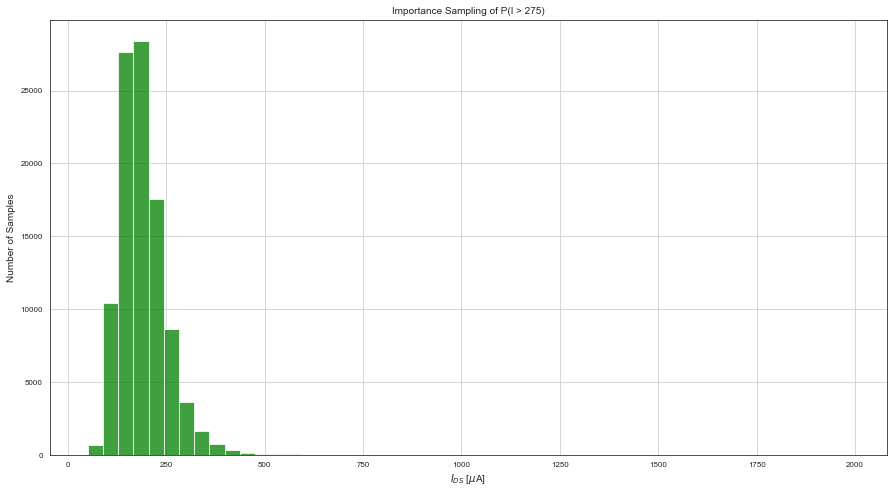

In [20]:
IS_histogram(1e5)

In [21]:
num_samples = [1e3, 1e4, 1e5, 1e6]
num_repetitions = 25

total_probas = []
for i, num_sample in enumerate(num_samples):
    print("Iter {}/{}".format(i+1, len(num_samples)))
    probas = importance_sampling(num_repetitions, num_sample, verbose=False)
    total_probas.append(probas)

Iter 1/4
Iter 2/4
Iter 3/4
Iter 4/4


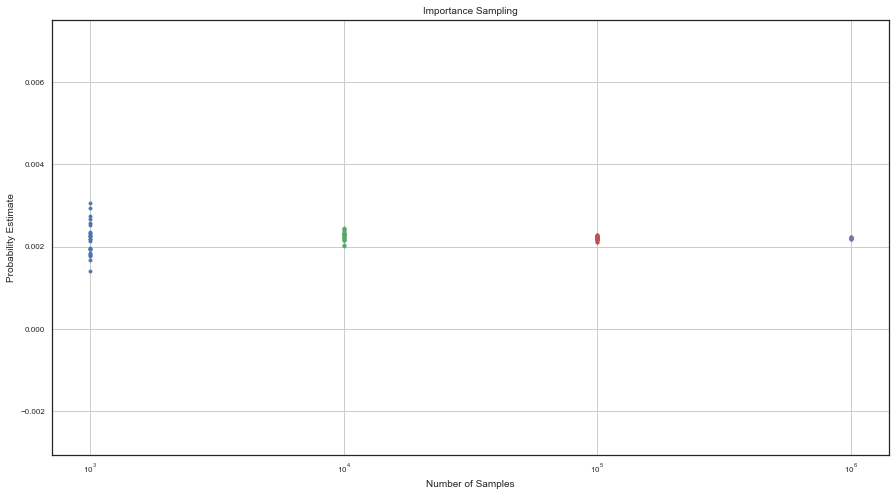

In [84]:
y_axis = np.asarray(total_probas)
x_axis = np.asarray(num_samples)

for x, y in zip(x_axis, y_axis):
    plt.scatter([x] * len(y), y, s=12)
    
plt.xscale('log')
plt.title("Importance Sampling")
plt.ylabel("Probability Estimate")
plt.xlabel('Number of Samples')
plt.grid(True)
plt.savefig(plot_dir + 'imp_sampling_convergence_speed.pdf', format='pdf', dpi=300)
plt.show()

## References

* http://ib.berkeley.edu/labs/slatkin/eriq/classes/guest_lect/mc_lecture_notes.pdf